**Correlation**



  


In [1]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 150

In [3]:
# loading data set as Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%207/automobile.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


# Data Cleaning

In [5]:
# Find out the number of values which are not numeric
df['price'].str.isnumeric().value_counts()

# List out the values which are not numeric
df['price'].loc[df['price'].str.isnumeric() == False]

#Setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head()

,price
0,13495
1,16500
2,16500
3,13950
4,17450


In [6]:
# Cleaning the horsepower losses field
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)
df['horsepower'].head()

,horsepower
0,111
1,111
2,154
3,102
4,115


In [7]:
# Cleaning the Normalized losses field
df[df['normalized-losses']=='?'].count()
nl=df['normalized-losses'].loc[df['normalized-losses'] !='?'].count()
nmean=nl.astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nmean).astype(int)
df['normalized-losses'].head()

,normalized-losses
0,164
1,164
2,164
3,164
4,164


Now computing the Measure of central tendency of the values in column height. Remember taking only a single column of the data set we are making a univariate analysis.

In [8]:
#calculate mean, median and mode of dat set height
mean = df["height"].mean()
median =df["height"].median()
mode = df["height"].mode()
print(mean , median, mode)

53.72487804878049 54.1 0    50.8
Name: height, dtype: float64


Now let's visualize this analysis in graph.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


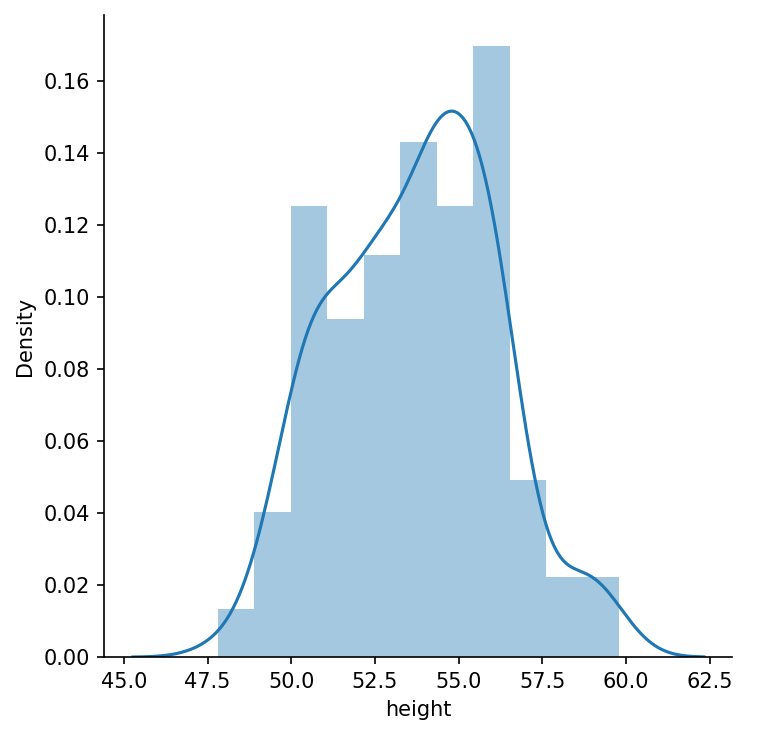

In [11]:
sns.FacetGrid(df,height=5).map(sns.distplot,"height").add_legend()

From the above graph, we can observe that the hight of maximum cars ranges from 53 to 57.

Now, let's draw the same with price. Since data type of price is object so first change object to numeric data type.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


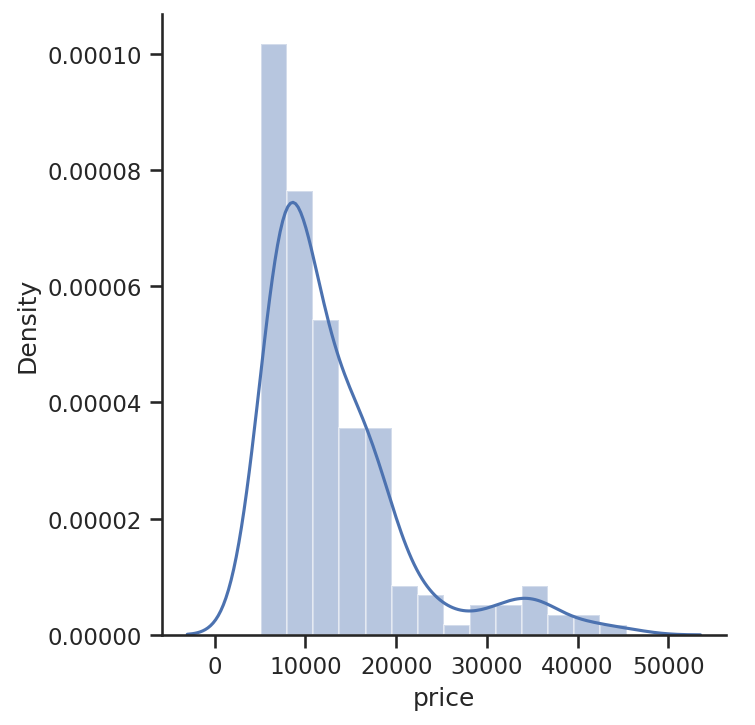

In [53]:
#distribution plot
sns.FacetGrid(df,height=5).map(sns.distplot,"price").add_legend()

From the above graph, we can say that the price ranges from 5,000 to 45,000 but the maximum car price ranges between 5,000 to 10,000.

The box plot is also efective visual representation of statical measures like median and quartiles in univariate analysis.

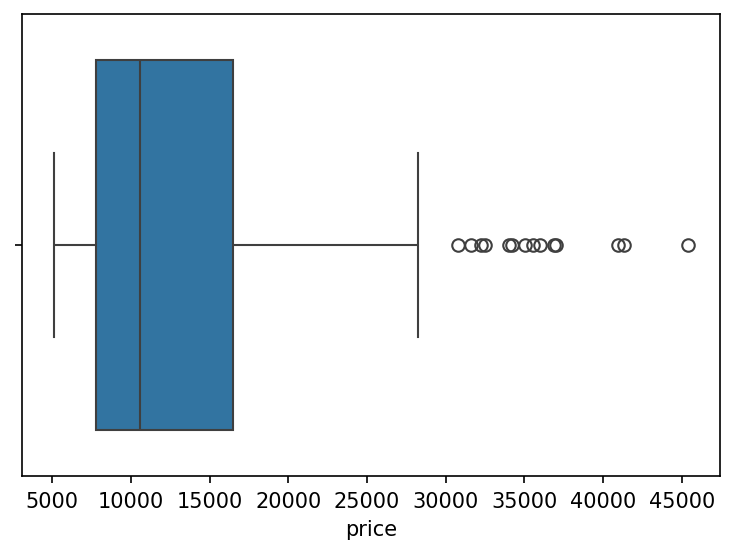

In [14]:
#boxplot for price of cars
sns.boxplot(x="price",data=df)
plt.show()

The right border of the box is Q3 and the left border of the box is Q1. Lines extend from both sides of the box boundaries toward the minimum and maximum. Based on the convention our plotting tool uses, though, they may only extend to a certain statistic; any values beyond these statistics are marked as outliers (using points).[Referance:HANDSON_DATA_ANALYSIS_WITH_PANDAS.pdf]


**Bivariate Analysis**



Text(0, 0.5, 'price')

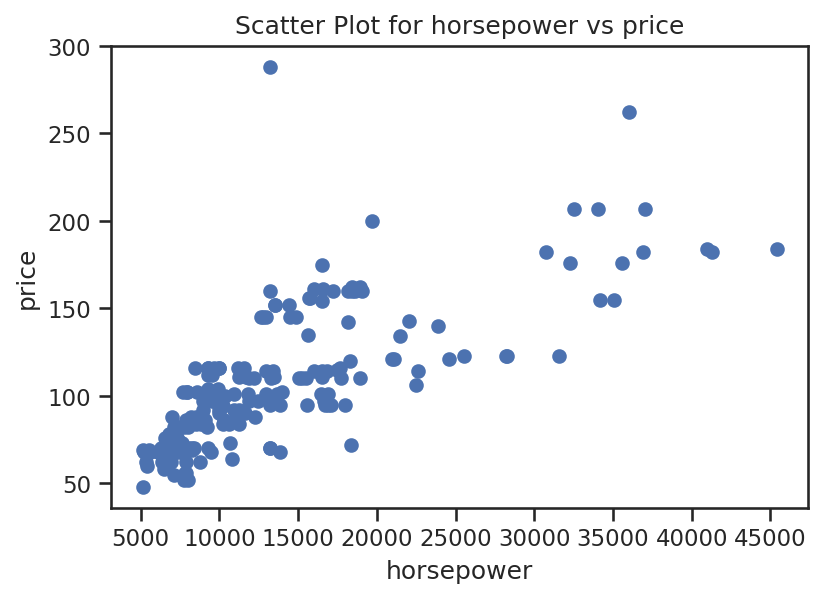

In [22]:
# plot the relationship between “horsepower” and ”price”
plt.scatter(df["price"], df["horsepower"])
plt.title("Scatter Plot for horsepower vs price")
plt.xlabel("horsepower")
plt.ylabel("price")

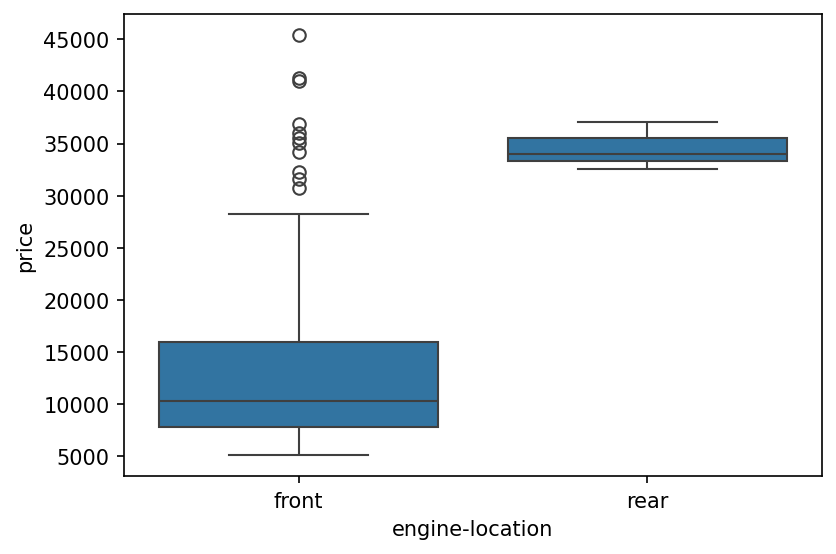

In [16]:
#boxplot
sns.boxplot(x="engine-location",y="price",data=df)
plt.show()

<Axes: xlabel='drive-wheels', ylabel='price'>

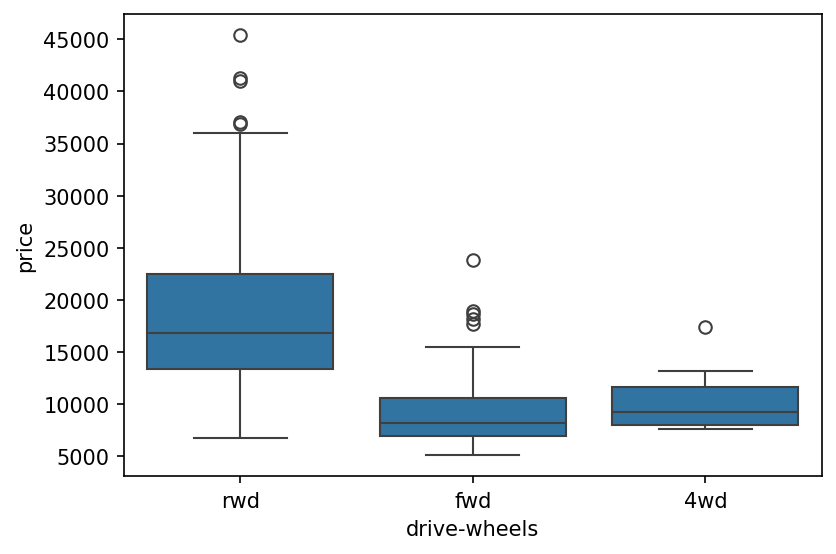

In [17]:
#boxplot to visualize the distribution of "price" with types of "drive-wheels"
sns.boxplot(x="drive-wheels", y="price",data=df)

Figure above illustrates the range of prices in cars with different wheel types. Boxplot shows the average and median price in respective wheel types and some outliers.

**Multivariate Analysis**



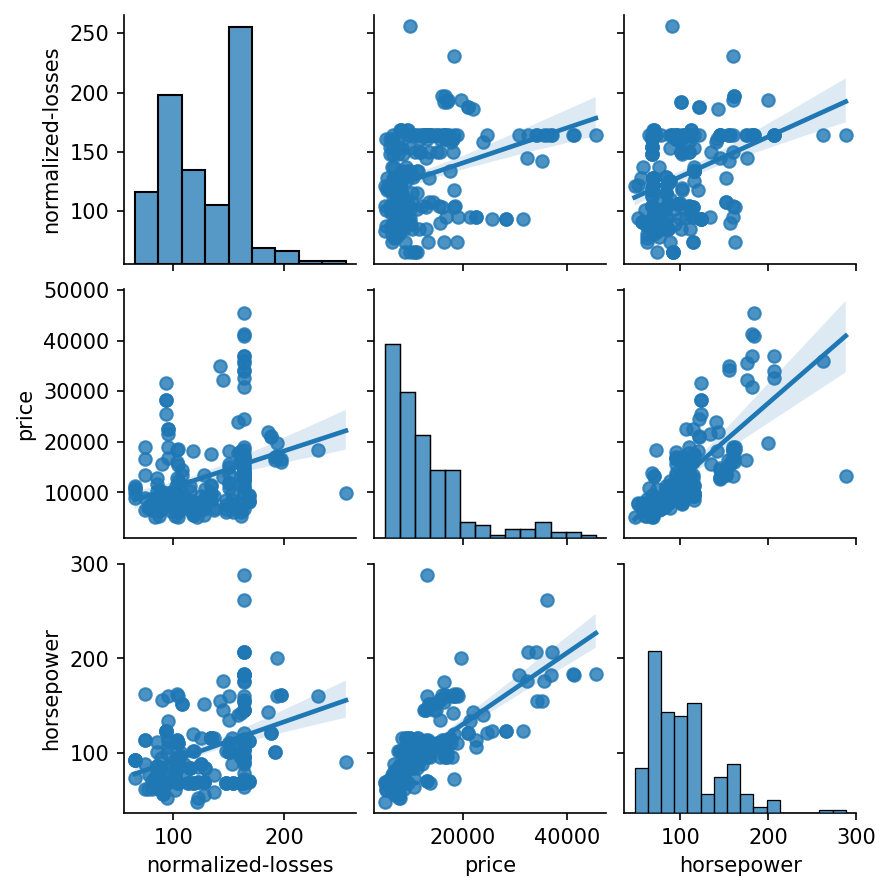

In [18]:
# pair plot with plot type regression
sns.pairplot(df,height=2, vars = ['normalized-losses', 'price','horsepower'],  kind="reg")
plt.show()

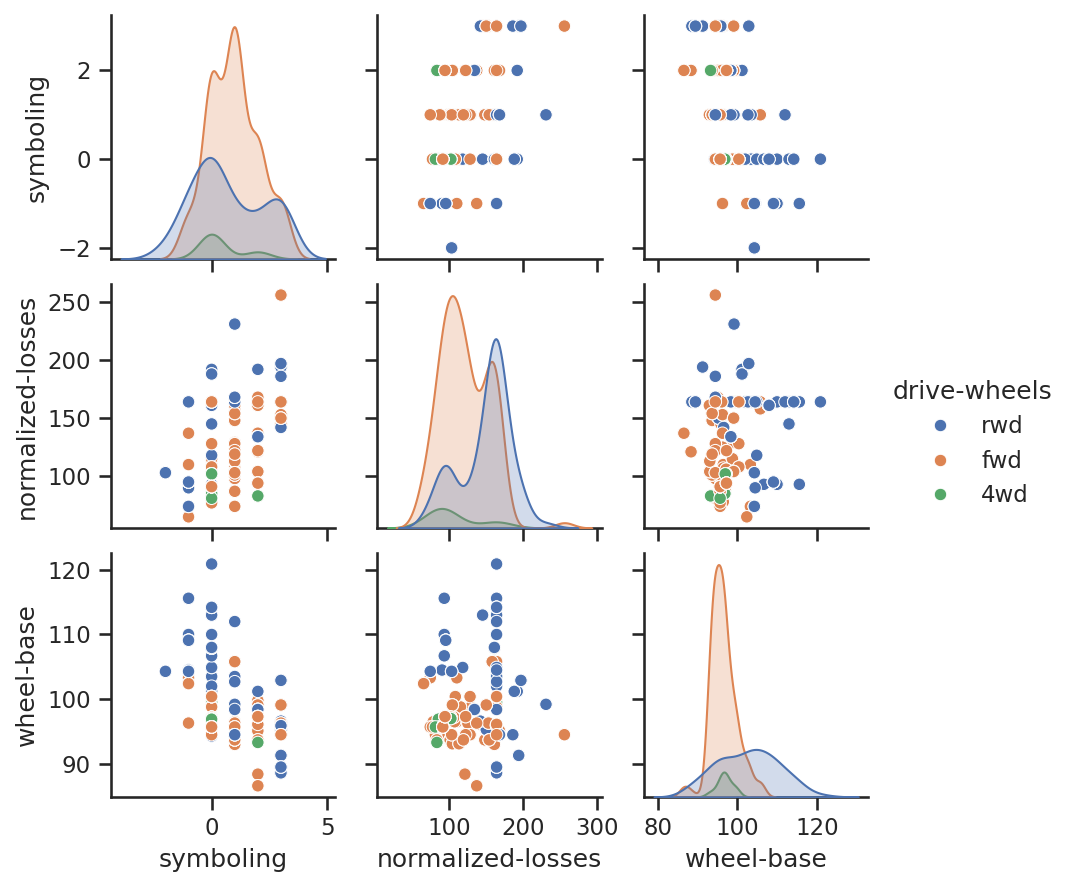

In [19]:
 #pair plot (matrix scatterplot) of few columns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = ['symboling', 'normalized-losses','wheel-base'], hue="drive-wheels")
plt.show()

In [20]:
from scipy import stats

corr = stats.pearsonr(df["price"], df["horsepower"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 1.5910332446595894e-39
cor:		 0.757945621793524


Here the correlation of these two variable is 0.80957 which is close to +1 thus we can make sure that price and horsepower are highly positively correlated. Using pandas corr( function correlation between entire numerical record can be calculated.

In [23]:
correlation = df.corr(method='pearson', numeric_only=True)
correlation

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.442093,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.071380,-0.035823,0.034606,-0.082201
normalized-losses,0.442093,1.000000,0.042699,0.155090,0.209908,-0.346399,0.262187,0.300268,-0.097432,0.371238,-0.344018,-0.307189,0.326489
wheel-base,-0.531954,0.042699,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,0.351985,-0.470414,-0.544082,0.583168
length,-0.357612,0.155090,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,0.554408,-0.670909,-0.704662,0.682986
width,-0.232919,0.209908,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,0.642176,-0.642704,-0.677218,0.728699
height,-0.541038,-0.346399,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.110114,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.262187,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,0.750973,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.300268,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,0.810705,-0.653658,-0.677470,0.861752
compression-ratio,-0.178515,-0.097432,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.205717,0.324701,0.265201,0.070990
horsepower,0.071380,0.371238,0.351985,0.554408,0.642176,-0.110114,0.750973,0.810705,-0.205717,1.000000,-0.803140,-0.770905,0.757946


Now let's visualize this correlation analysis with heatmap. Heatmap is best technique to make this look beautiful and easier to interpret.

<Axes: >

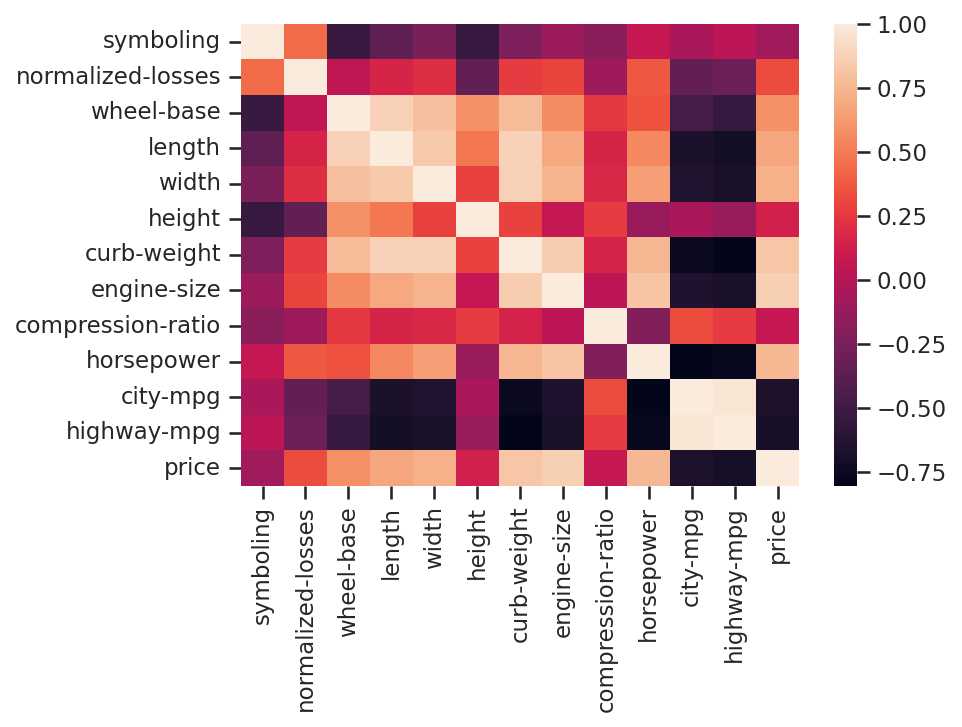

In [30]:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)

A coefficient close to 1 means that there’s a very strong positive correlation between the two variables. The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.

**Multivariate Analysis over titanic dataset**


In [25]:
#load data set
titanic=pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%207/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
titanic.shape

(891, 12)

Let’s take a  look at what is the number of records missing in the data set.

In [27]:
total = titanic.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [28]:
#percentage of women survived
women = titanic.loc[titanic.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

#percentage of men survived
men = titanic.loc[titanic.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print(str(rate_women) +" % of women who survived." )
print(str(rate_men) + " % of men who survived." )

0.7420382165605095 % of women who survived.
0.18890814558058924 % of men who survived.


You can see the number of females survival was high, so gender could be the attribute that contributes to analyzing the survival of any variable(person). Let's visualize this information on survival numbers in males and females.

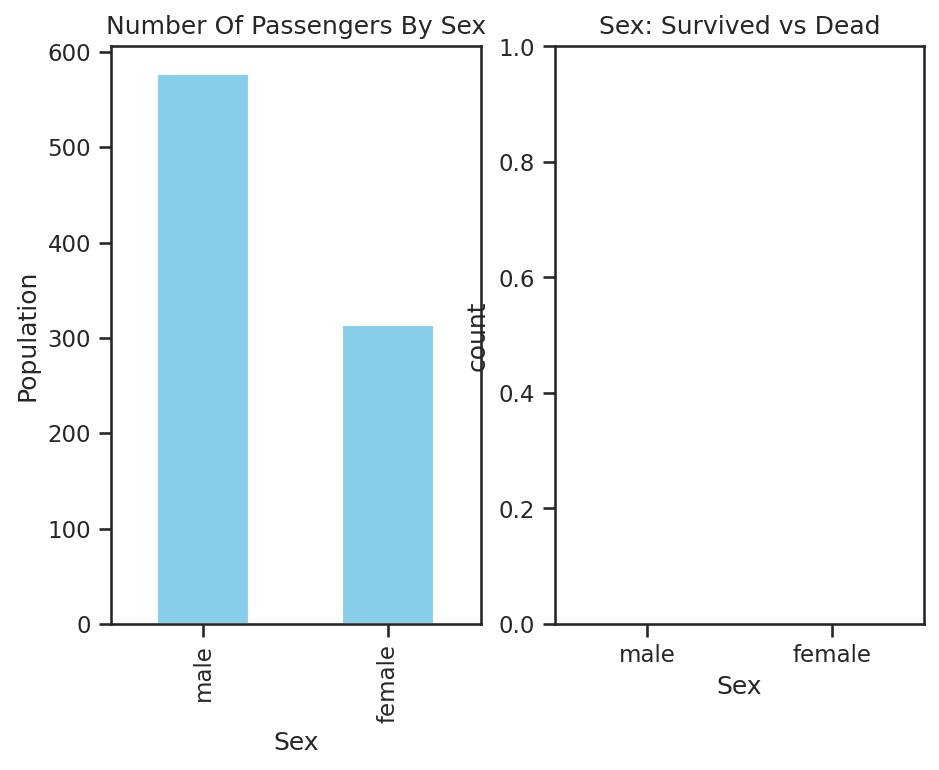

In [31]:
titanic['Survived'] = titanic['Survived'].map({0:"not_survived", 1:"survived"})

fig, ax = plt.subplots(1, 2, figsize = (7, 5))
titanic["Sex"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Population")
sns.countplot(x="Sex", hue = "Survived", data = titanic, ax = ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()

Let's visualize the number of survival and death from different Pclasses.

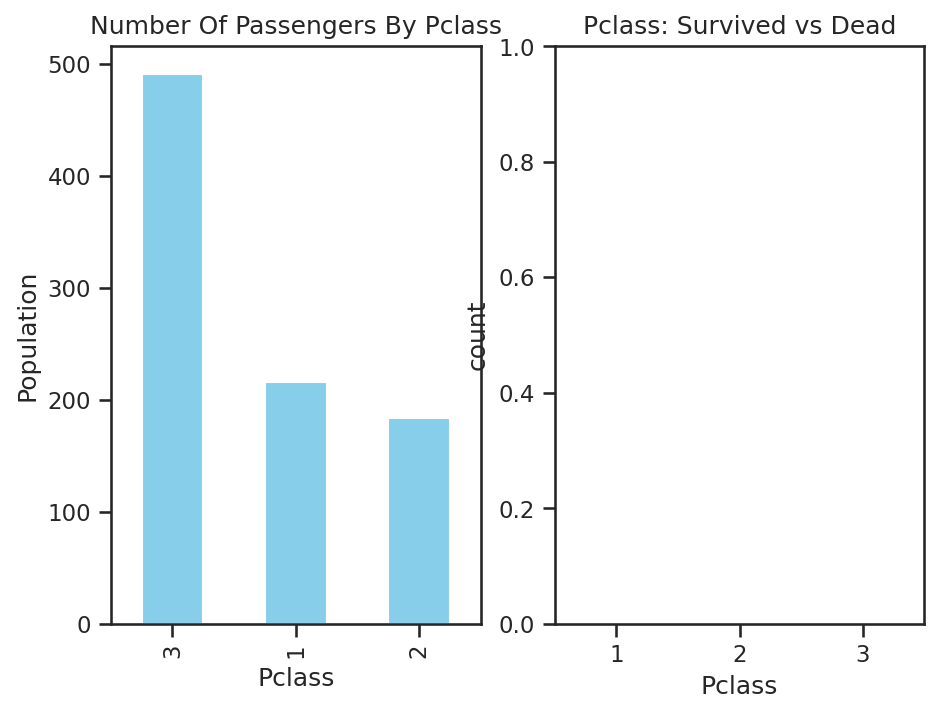

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (7, 5))
titanic["Pclass"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Population")
sns.countplot(x="Pclass", hue = "Survived", data = titanic, ax = ax[1])
ax[1].set_title("Pclass: Survived vs Dead")
plt.show()

Looks like the number of passenger in Pclass 3 was high and maximum of them could not survive. death  Pclass the number of death is high. And in Pclass 1 maximum of the passengers were survived.

In [37]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,NaN,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,NaN,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,NaN,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,NaN,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,NaN,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,NaN,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,NaN,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,NaN,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,NaN,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


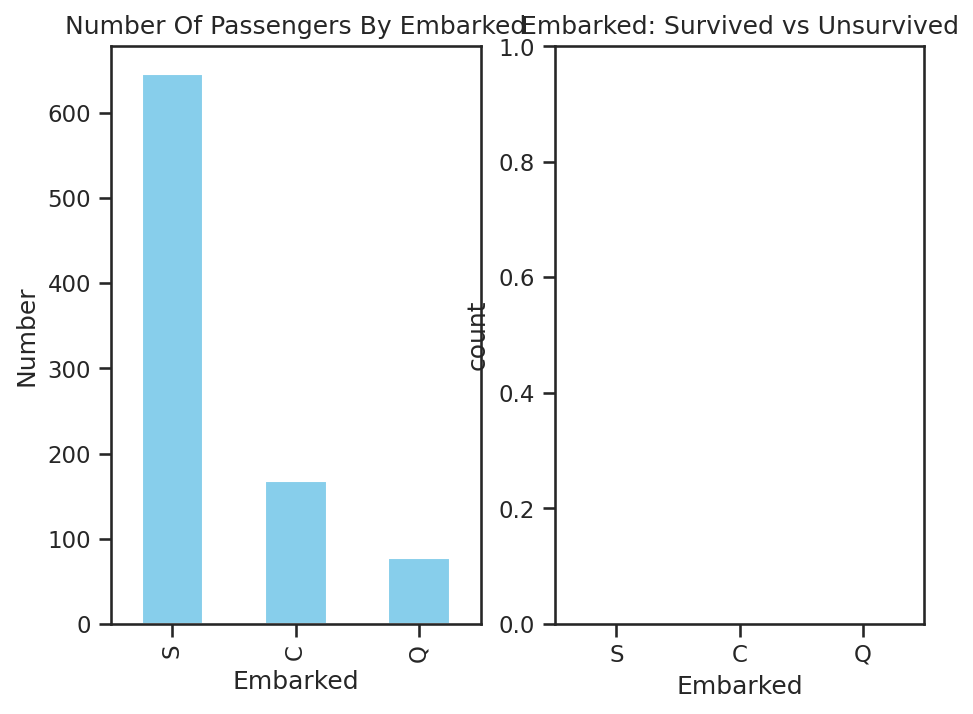

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (7, 5))
titanic["Embarked"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Embarked")
ax[0].set_ylabel("Number")
sns.countplot(x="Embarked", hue = "Survived", data = titanic, ax = ax[1])
ax[1].set_title("Embarked: Survived vs Unsurvived")
plt.show()

/tmp/ipython-input-3261662497.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'].dropna())


<Axes: xlabel='Age', ylabel='Density'>

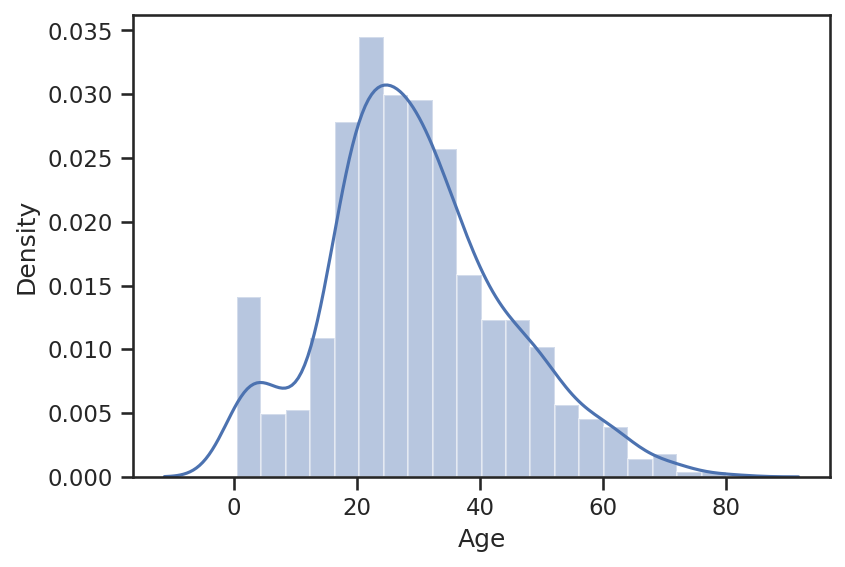

In [42]:
sns.distplot(titanic['Age'].dropna())

Now let's do first multivariate analysis into titanic data set with variables Survived, Pclass,Fear and Age.

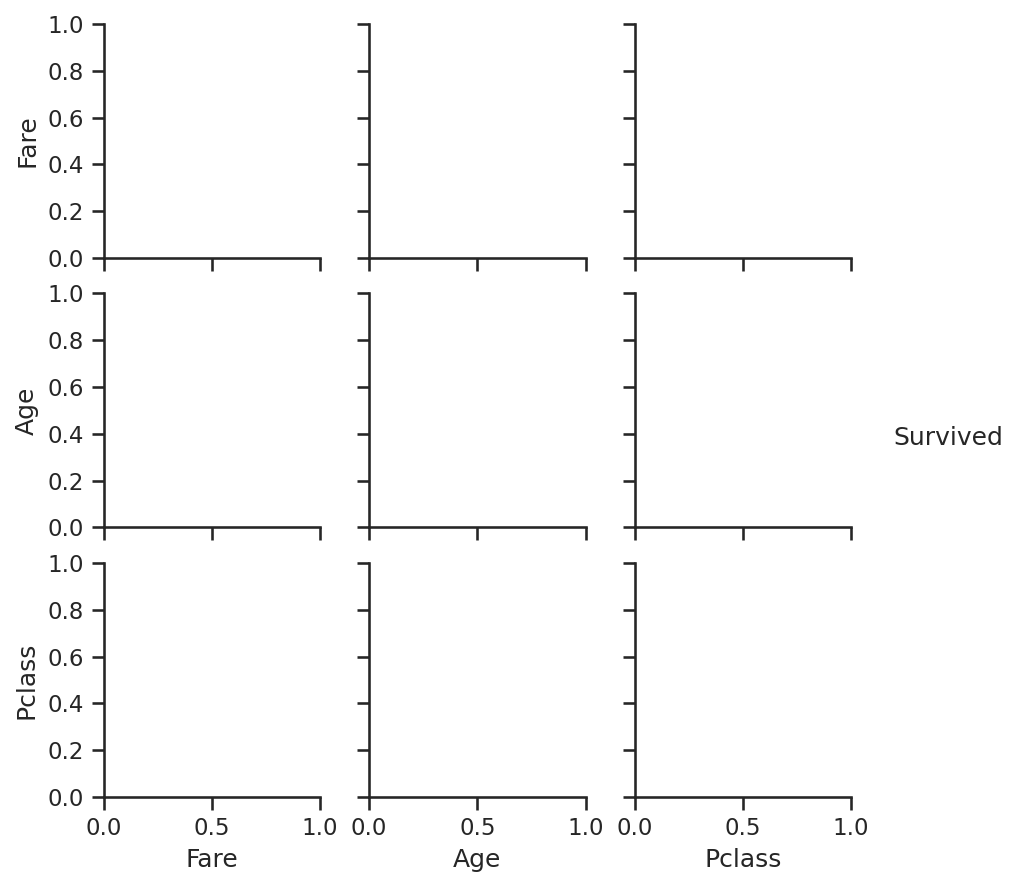

In [43]:

sns.set(style="ticks", color_codes=True)
sns.pairplot(titanic,height=2,vars = [ 'Fare','Age','Pclass'], hue="Survived")
plt.show()

Now lets' view the correlation table with heatmap. But first map Embarked records with integer values so that we can include Embrake too in our correlation analysis.

In [50]:
# Reload the titanic dataset to ensure 'Survived' and 'Embarked' columns are in their original state
# before processing for correlation.
titanic = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%207/titanic.csv")

# For 'Survived', it's already 0 or 1 after loading, but let's handle potential NaNs robustly.
# Convert to numeric (should already be int, but good practice if intermediate steps corrupted it)
titanic['Survived'] = pd.to_numeric(titanic['Survived'], errors='coerce')
# Fill any NaNs in 'Survived'. If all are NaN, mode() will fail. Use 0 as a default if mode is empty.
if not titanic['Survived'].dropna().empty:
    survived_mode = titanic['Survived'].mode()[0]
else:
    survived_mode = 0 # Default to '0' (not survived) if column is entirely NaN
titanic['Survived'] = titanic['Survived'].fillna(survived_mode).astype(int)

# For 'Embarked', fill NaNs with 'S' as done previously, then map to numeric
titanic['Embarked'] = titanic['Embarked'].fillna("S") # Fills initial NaNs with 'S'
titanic['Embarked'] = titanic['Embarked'].map({"S":1, "C":2,"Q":2})
# After mapping, if some non-S/C/Q values existed, they might become NaN. Handle this.
if not titanic['Embarked'].dropna().empty:
    embarked_mode = titanic['Embarked'].mode()[0]
else:
    embarked_mode = 1 # Default to 'S' (mapped to 1) if column is entirely NaN after initial fill/map
titanic['Embarked'] = titanic['Embarked'].fillna(embarked_mode).astype(int)


# Calculate correlation only for numeric columns
Tcorrelation = titanic.corr(method='pearson', numeric_only=True)
Tcorrelation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.022204
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.074053
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.023233
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.068734
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.060814
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.162184
Embarked,-0.022204,0.149683,-0.074053,0.023233,-0.068734,-0.060814,0.162184,1.000000


<Axes: >

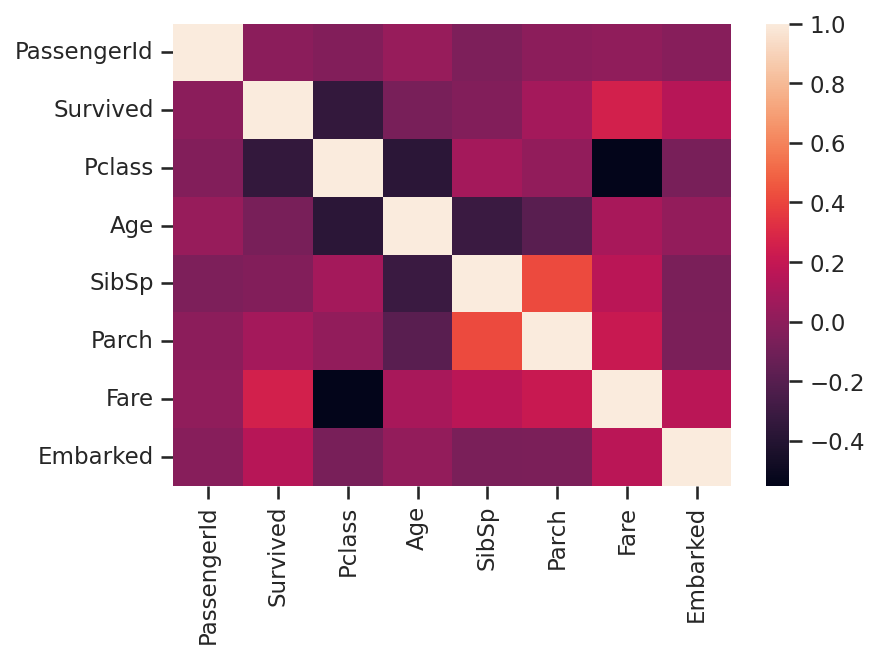

In [51]:
sns.heatmap(Tcorrelation,xticklabels=Tcorrelation.columns,
            yticklabels=Tcorrelation.columns)